# CONVOLUTIONAL NEURAL NETWORK

### Libraries

In [1]:
import numpy as np 
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import StratifiedKFold

import os


## Preprocessing

#### Img and batch size

In [2]:
img_size = (64, 64)
batches_size = 16

### Upload training_set

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255) # rescale the images (pixel number from 255 to -1<0<1)

training_set = train_datagen.flow_from_directory(
    'Dataset/train',
    target_size=img_size,       # pixel size of the image
    batch_size=batches_size,    # how many pictures in the batch
    color_mode= "grayscale",    # black-white scale (default is rbg)
    class_mode='binary',
    shuffle=True)               # binary classification

Found 4733 images belonging to 2 classes.


### Upload test_set

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = train_datagen.flow_from_directory(
    'Dataset/test',
    target_size=img_size,
    batch_size=batches_size,
    color_mode= "grayscale",
    class_mode='binary',
    shuffle=True)

Found 1184 images belonging to 2 classes.


### Image shape

In [5]:
import numpy as np

# Fetch a batch of images
images, labels = next(training_set)

# Check the shape of the first image in the batch
image_shape = images[0].shape

image_shape


(64, 64, 1)

In [6]:
training_set

### Plot 3 images

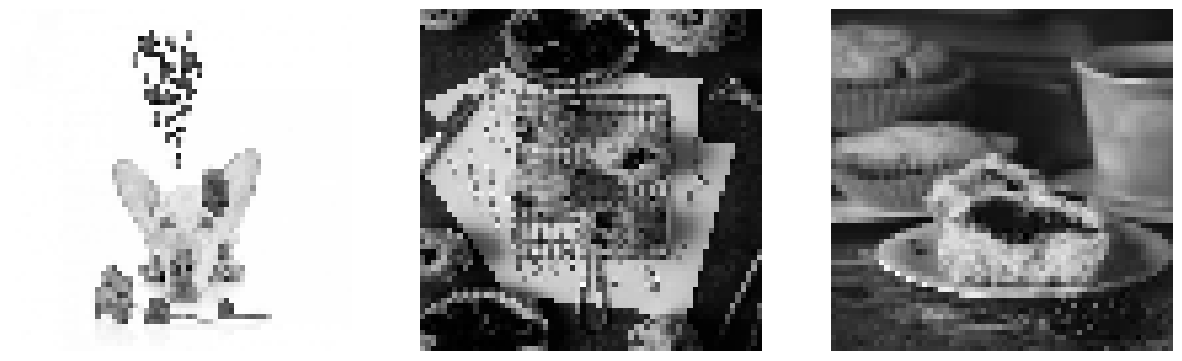

In [7]:
import matplotlib.pyplot as plt

# Get a batch of images from the training set
images, labels = next(training_set)

# Display three random images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    random_index = np.random.randint(0, len(images))
    ax[i].imshow(images[random_index], cmap = 'gray')
    ax[i].axis('off')

plt.show()


### Early stop definition

In [8]:
stop_early = [keras.callbacks.EarlyStopping(monitor="val_loss", 
                                            patience = 5)]

### Plotting function

In [9]:
def plot_result(prev_models):
  result = prev_models.history
  epochs = range(len(result["accuracy"]))

  img_accuracy = plt.figure()
  plt.plot(epochs, result["accuracy"], label="Training")
  plt.plot(epochs, result["val_accuracy"], label="Validation")
  plt.title("Accuracy")
  plt.legend()

  img_loss = plt.figure()
  plt.plot(epochs, result['loss'], label="Training")
  plt.plot(epochs, result['val_loss'], label="Validation")
  plt.title("Loss")
  plt.legend()

  return img_accuracy, img_loss

Save plot function

In [10]:
def save_plots_as_jpeg(plots, save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    for i, plot in enumerate(plots):
        plot.savefig(f"{save_dir}/plot_{i+1}.jpeg")

# Specify the directory where you want to save the plots
save_directory = "plots"


## CNN baseline

In [11]:
cnn_base = Sequential()     # initialize model

# Convolution layer
cnn_base.add(Conv2D(filters=32,
                    kernel_size=(3, 3),
                    input_shape = image_shape))
cnn_base.add(Activation('relu'))
cnn_base.add(MaxPooling2D(pool_size= (2,2)))


# Dense layer
cnn_base.add(Flatten())
cnn_base.add(Dense(units=32, 
                   activation='relu'))

# Output layer
cnn_base.add(Flatten())

cnn_base.add(Dense(units=1,
                   activation='sigmoid'))


In [12]:
cnn_base.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 32)                984096    
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                        

In [14]:
cnn_base.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])


#### Training

In [32]:
prev_models = cnn_base.fit(x = training_set,
						validation_data = test_set,
						epochs = 20,
						callbacks = stop_early)

Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_2/dense_3/BiasAdd' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\Enrico\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Enrico\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\Enrico\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\Enrico\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 604, in run_forever
      self._run_once()
    File "c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Enrico\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\Enrico\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\Enrico\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\Enrico\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\Enrico\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\Enrico\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Enrico\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "C:\Users\Enrico\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "C:\Users\Enrico\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Enrico\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Enrico\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Enrico\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Enrico\AppData\Local\Temp\ipykernel_25552\3247573223.py", line 1, in <module>
      prev_models = cnn_base.fit(x = training_set,
    File "c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Enrico\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\layers\core\dense.py", line 252, in call
      outputs = tf.nn.bias_add(outputs, self.bias)
Node: 'sequential_2/dense_3/BiasAdd'
Matrix size-incompatible: In[0]: [32,12800], In[1]: [56448,1]
	 [[{{node sequential_2/dense_3/BiasAdd}}]] [Op:__inference_train_function_1074]

#### Display result

(<Figure size 640x480 with 1 Axes>, <Figure size 640x480 with 1 Axes>)

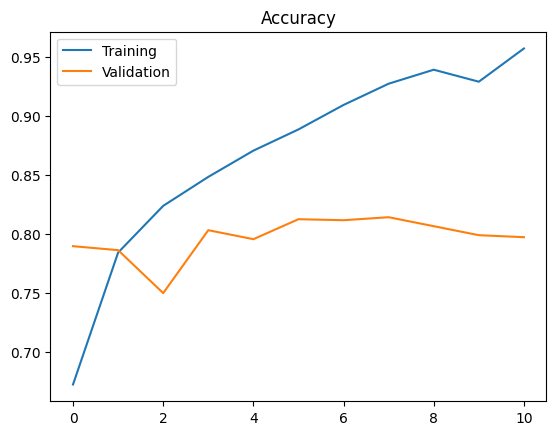

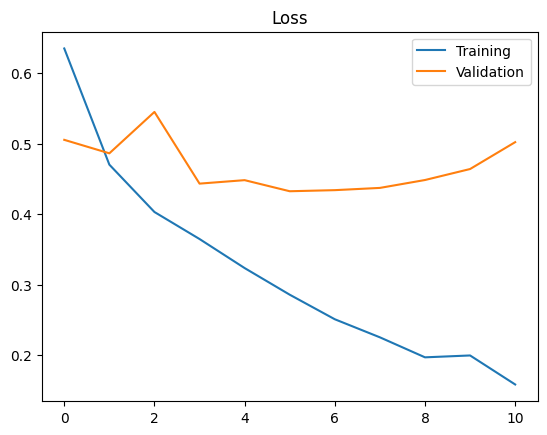

In [18]:
img_accuracy, img_loss = plot_result(prev_models)

## MODEL 1

##### Architecture cnn1

In [13]:
cnn1 = Sequential()

# Convolution 1
cnn1.add(Conv2D(filters=16,
                kernel_size=(3,3),
                activation='relu',
                input_shape = image_shape))
cnn1.add(MaxPooling2D(pool_size=(2,2)))
cnn1.add(Dropout(0.2))

# Convolution 2
cnn1.add(Conv2D(filters=64,
                kernel_size=(3,3),
                activation='relu'))
cnn1.add(MaxPooling2D(pool_size=(2,2)))
cnn1.add(Dropout(0.3))

# Convolution 3
cnn1.add(Conv2D(filters=64,
                kernel_size=(5,5),
                activation='relu'))
cnn1.add(MaxPooling2D(pool_size=(2,2)))
cnn1.add(Dropout(0.5))


# Dense layer
cnn1.add(Flatten())
cnn1.add(Dense(units=128,
               activation='relu'))
cnn1.add(Dropout(0.5))


# Output layer
cnn1.add(Flatten())
cnn1.add(Dense(units=1,
               activation='sigmoid'))

In [24]:
cnn1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 31, 31, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        9280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 14, 14, 64)       

In [14]:
cnn1.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

#### Training

In [25]:
prev_models = cnn1.fit(x = training_set,
                           validation_data = test_set,
                           epochs = 15,
                           callbacks = stop_early)

Epoch 1/15
148/148 [==============================] - 122s 822ms/step - loss: 0.6610 - accuracy: 0.5840 - val_loss: 0.5841 - val_accuracy: 0.7137
Epoch 2/15
148/148 [==============================] - 49s 333ms/step - loss: 0.5276 - accuracy: 0.7460 - val_loss: 0.5064 - val_accuracy: 0.7618
Epoch 3/15
148/148 [==============================] - 48s 326ms/step - loss: 0.4655 - accuracy: 0.7919 - val_loss: 0.4230 - val_accuracy: 0.8108
Epoch 4/15
148/148 [==============================] - 48s 327ms/step - loss: 0.4311 - accuracy: 0.8020 - val_loss: 0.4438 - val_accuracy: 0.8041
Epoch 5/15
148/148 [==============================] - 46s 310ms/step - loss: 0.4085 - accuracy: 0.8210 - val_loss: 0.3880 - val_accuracy: 0.8370
Epoch 6/15
148/148 [==============================] - 47s 316ms/step - loss: 0.3931 - accuracy: 0.8356 - val_loss: 0.3644 - val_accuracy: 0.8438
Epoch 7/15
148/148 [==============================] - 47s 316ms/step - loss: 0.3668 - accuracy: 0.8424 - val_loss: 0.3482 - val_a

#### Display result

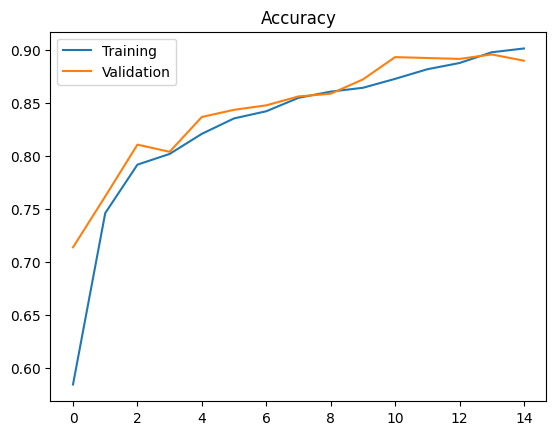

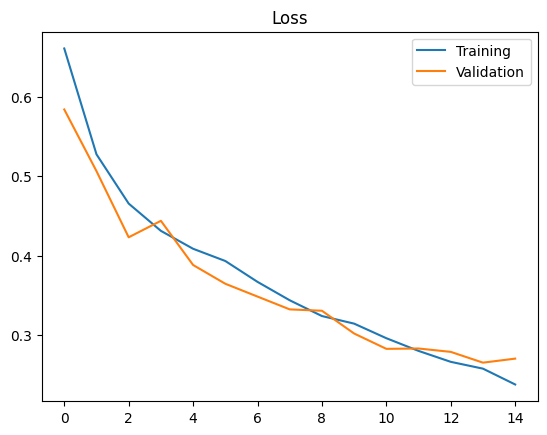

In [26]:
img_accuracy, img_loss = plot_result(prev_models)

save plot

In [23]:
# save_plots_as_jpeg([img_accuracy, img_loss], save_directory)

In [15]:
import pydot
import graphviz
from keras.utils import plot_model
plot_model(cnn1, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Cross Validation 5-fold

In [65]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

# Initialize the StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store scores
scores = []

# Collect all the data from the Keras generator
all_data = []
for i in range(len(training_set)):
    data, _ = training_set[i]  # Discarding the labels
    all_data.extend(data)

# Perform 5-fold cross-validation
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True)
for train, test in kfold.split(all_data):
    train_data, test_data = np.array(all_data)[train], np.array(all_data)[test]

    cnn1 = Sequential()

    # Convolution 1
    cnn1.add(Conv2D(filters=16,
                    kernel_size=(3,3),
                    activation='relu',
                    input_shape = image_shape))
    cnn1.add(MaxPooling2D(pool_size=(2,2)))
    cnn1.add(Dropout(0.2))

    # Convolution 2
    cnn1.add(Conv2D(filters=64,
                    kernel_size=(3,3),
                    activation='relu'))
    cnn1.add(MaxPooling2D(pool_size=(2,2)))
    cnn1.add(Dropout(0.3))

    # Convolution 3
    cnn1.add(Conv2D(filters=64,
                    kernel_size=(5,5),
                    activation='relu'))
    cnn1.add(MaxPooling2D(pool_size=(2,2)))
    cnn1.add(Dropout(0.5))

    # Dense layer
    cnn1.add(Flatten())
    cnn1.add(Dense(units=128,
                   activation='relu'))
    cnn1.add(Dropout(0.5))

    # Output layer
    cnn1.add(Flatten())
    cnn1.add(Dense(units=1,
                   activation='sigmoid'))

    # Compile the model
    cnn1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Fit the model on the training data
    cnn1.fit_generator(training_set, steps_per_epoch=len(training_set), epochs=10, verbose=0)

    # Evaluate the model on the test data
    score = cnn1.evaluate_generator(training_set, steps=len(training_set))
    scores.append(score)

# Print the average and standard deviation of the scores
scores = np.array(scores)
print("Mean score: ", np.mean(scores, axis=0))
print("Standard deviation of scores: ", np.std(scores, axis=0))


C:\Users\Enrico\AppData\Local\Temp\ipykernel_20672\709523498.py:62: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn1.fit_generator(training_set, steps_per_epoch=len(training_set), epochs=10, verbose=0)
C:\Users\Enrico\AppData\Local\Temp\ipykernel_20672\709523498.py:65: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = cnn1.evaluate_generator(training_set, steps=len(training_set))


Mean score:  [0.3005105  0.87377985]
Standard deviation of scores:  [0.02788163 0.01428345]


## MODEL 2

#### Data Augmentation

In [11]:
from keras.layers import RandomZoom, RandomRotation, RandomTranslation, RandomContrast, RandomFlip

In [12]:
data_augment = Sequential()




In [13]:

# vedi pag 141 Graph book

data_augment.add(RandomRotation(0.2,
                                fill_mode='reflect',
                                input_shape = image_shape))


data_augment.add(RandomZoom(0.2))

data_augment.add(RandomTranslation(0.1, 0.1, fill_mode='nearest'))

data_augment.add(RandomFlip('horizontal'))



In [18]:
data_augment.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation (RandomRota  (None, 64, 64, 1)        0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 64, 64, 1)         0         
                                                                 
 random_translation (RandomT  (None, 64, 64, 1)        0         
 ranslation)                                                     
                                                                 
 random_flip (RandomFlip)    (None, 64, 64, 1)         0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


#### Architecture cnn2

In [16]:
cnn2 = Sequential(data_augment)


# Convolution 1
cnn2.add(Conv2D(filters=32,
                kernel_size=(3,3),
                activation='relu',
                input_shape = image_shape))
cnn2.add(MaxPooling2D(pool_size=(2,2)))
cnn2.add(Dropout(0.2))

# Convolution 2
cnn2.add(Conv2D(filters=64,
                kernel_size=(3,3),
                activation='relu'))
cnn2.add(MaxPooling2D(pool_size=(2,2)))
cnn2.add(Dropout(0.3))

# Convolution 3
cnn2.add(Conv2D(filters=64,
                kernel_size=(5,5),
                activation='relu'))
cnn2.add(MaxPooling2D(pool_size=(2,2)))
cnn2.add(Dropout(0.5))


# Dense layer
cnn2.add(Flatten())
cnn2.add(Dense(units=128,
               activation='relu'))
cnn2.add(Dropout(0.5))


# Output layer
cnn2.add(Flatten())
cnn2.add(Dense(units=1,
               activation='sigmoid'))

In [17]:
cnn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 64, 64, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                  

Adjust learning rate

In [19]:
cnn2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

#### Training

In [20]:
prev_models = cnn2.fit(x = training_set,
                           validation_data = test_set,
                           epochs = 40)
 #                          callbacks = stop_early)

Epoch 1/40
296/296 [==============================] - 128s 427ms/step - loss: 0.6928 - accuracy: 0.5261 - val_loss: 0.6897 - val_accuracy: 0.5405
Epoch 2/40
296/296 [==============================] - 62s 210ms/step - loss: 0.6674 - accuracy: 0.5785 - val_loss: 0.6456 - val_accuracy: 0.6064
Epoch 3/40
296/296 [==============================] - 66s 223ms/step - loss: 0.6188 - accuracy: 0.6641 - val_loss: 0.6354 - val_accuracy: 0.6284
Epoch 4/40
296/296 [==============================] - 64s 215ms/step - loss: 0.5880 - accuracy: 0.6993 - val_loss: 0.8023 - val_accuracy: 0.5777
Epoch 5/40
296/296 [==============================] - 59s 198ms/step - loss: 0.5530 - accuracy: 0.7268 - val_loss: 0.8040 - val_accuracy: 0.5912
Epoch 6/40
296/296 [==============================] - 57s 191ms/step - loss: 0.5354 - accuracy: 0.7329 - val_loss: 0.9118 - val_accuracy: 0.5845
Epoch 7/40
296/296 [==============================] - 57s 191ms/step - loss: 0.5331 - accuracy: 0.7389 - val_loss: 0.8928 - val_a

#### Dispaly result

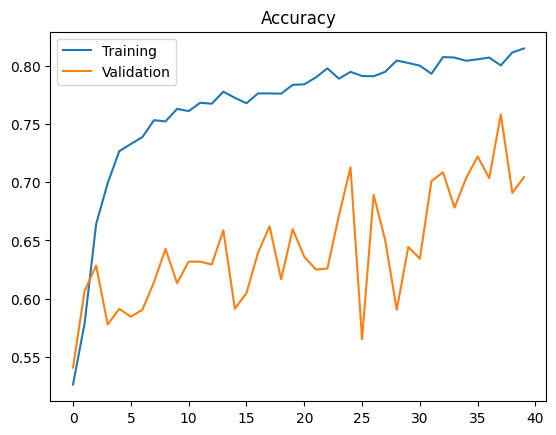

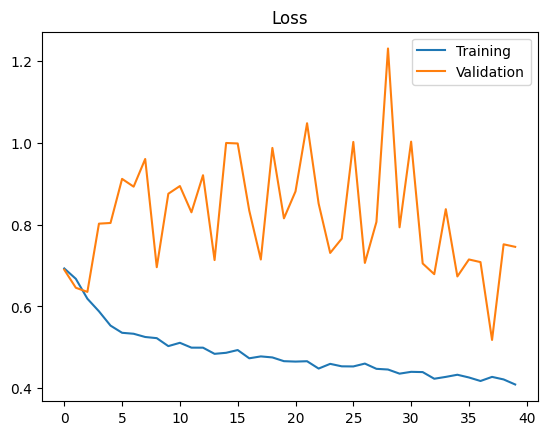

In [21]:
img_accuracy, img_loss = plot_result(prev_models)

Save plot

In [22]:
save_plots_as_jpeg([img_accuracy, img_loss], save_directory)

## MODEL 3

#### Architecture cnn3

In [28]:
# try with 2 padding + strides 2

cnn3 = Sequential()

# Convolution 1
cnn3.add(Conv2D(filters=16,
                kernel_size=(3,3),
                activation='relu',
                input_shape = image_shape,
                padding='same'))
cnn3.add(MaxPooling2D(pool_size=(2,2), strides=2))
cnn3.add(Dropout(0.2))

# Convolution 2
cnn3.add(Conv2D(filters=64,
                kernel_size=(3,3),
                activation='relu',
                padding='same'))
cnn3.add(MaxPooling2D(pool_size=(2,2), strides=2))
cnn3.add(Dropout(0.3))

# Convolution 3
cnn3.add(Conv2D(filters=128,
                kernel_size=(5,5),
                activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2,2)))
cnn3.add(Dropout(0.5))


# Dense layer
cnn3.add(Flatten())
cnn3.add(Dense(units=128,
               activation='relu'))
cnn3.add(Dropout(0.5))


# Output layer
cnn3.add(Flatten())
cnn3.add(Dense(units=1,
               activation='sigmoid'))

In [29]:
cnn3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 64, 64, 16)        160       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 32, 32, 16)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        9280      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 16, 16, 64)       

Adjust learning rate

In [30]:
cnn3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

#### Training

In [31]:
prev_models = cnn3.fit(x = training_set,
                           validation_data = test_set,
                           epochs = 30,
                           callbacks = stop_early)

Epoch 1/30
296/296 [==============================] - 129s 430ms/step - loss: 0.6278 - accuracy: 0.6385 - val_loss: 0.5437 - val_accuracy: 0.7247
Epoch 2/30
296/296 [==============================] - 52s 176ms/step - loss: 0.4935 - accuracy: 0.7737 - val_loss: 0.4556 - val_accuracy: 0.7939
Epoch 3/30
296/296 [==============================] - 54s 182ms/step - loss: 0.4447 - accuracy: 0.8065 - val_loss: 0.4205 - val_accuracy: 0.8243
Epoch 4/30
296/296 [==============================] - 55s 187ms/step - loss: 0.4099 - accuracy: 0.8158 - val_loss: 0.4356 - val_accuracy: 0.8074
Epoch 5/30
296/296 [==============================] - 54s 182ms/step - loss: 0.3816 - accuracy: 0.8371 - val_loss: 0.3665 - val_accuracy: 0.8488
Epoch 6/30
296/296 [==============================] - 51s 173ms/step - loss: 0.3550 - accuracy: 0.8510 - val_loss: 0.4092 - val_accuracy: 0.8159
Epoch 7/30
296/296 [==============================] - 50s 170ms/step - loss: 0.3279 - accuracy: 0.8603 - val_loss: 0.3340 - val_a

#### Display result

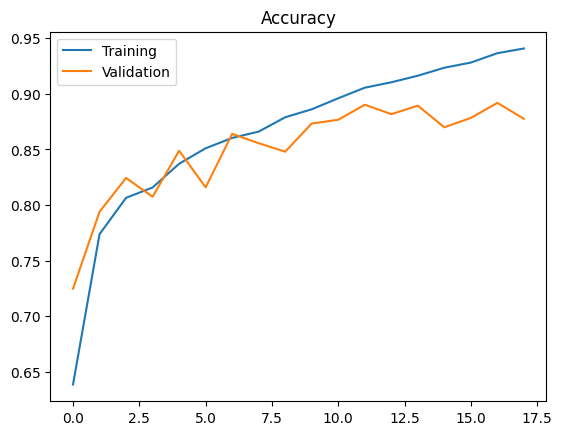

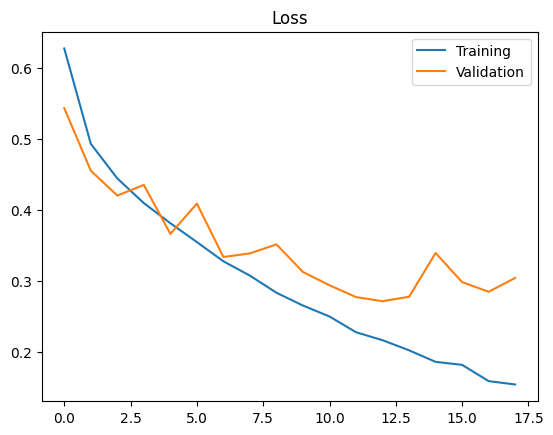

In [32]:
img_accuracy, img_loss = plot_result(prev_models)

save plot

In [33]:
save_plots_as_jpeg([img_accuracy, img_loss], save_directory)